In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

E:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# 读取数据集
fileName = "raw_price_train/1_r_price_train.csv"
data = pd.read_csv(fileName)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012/9/4,95.108574,96.448570,94.928574,96.424286,87.121140,91973000
1,2012/9/5,96.510002,96.621429,95.657143,95.747147,86.509338,84093800
2,2012/9/6,96.167145,96.898575,95.828575,96.610001,87.288956,97799100
3,2012/9/7,96.864288,97.497147,96.538574,97.205711,87.827171,82416600
4,2012/9/10,97.207146,97.612854,94.585716,94.677139,85.542564,121999500


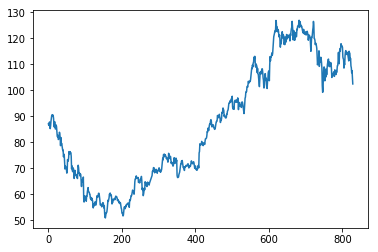

In [5]:
plt.plot(data["Adj Close"].tolist())

 # 数据预处理

In [5]:
# 归一化
min_data = np.min(data["Adj Close"].values)
max_data = np.max(data["Adj Close"].values)
data["Adj Close"] = (data["Adj Close"]-min_data)/(max_data-min_data)

In [6]:
def preprocess(data,m):
    '''
    data: the dataframe of stock price
    m: the length of sequence
    '''
    adj_close = data["Adj Close"].tolist()
    #
    res_X = []
    res_y = []
    # 剔除前4个元素
    for i in range(4,len(adj_close)-m):
        res_X.append(adj_close[i:i+m])
        res_y.append(adj_close[i+m])
    return res_X,res_y

In [20]:
X,y = preprocess(data,1)
print(X)
print(y)

[[0.4553401244132892], [0.45168928984415796], [0.4673120610761984], [0.4897107342214377], [0.5038051848702709], [0.518239516671477], [0.521856526264114], [0.5221792252230598], [0.5164056661664007], [0.5187654812417941], [0.5029728746843692], [0.4736799450990766], [0.45948361167390317], [0.4868914993952945], [0.4627442946763538], [0.44965127909589353], [0.4529119620983441], [0.47013119065153963], [0.4622346834493983], [0.4381039373246209], [0.41361685145330696], [0.4096768403056683], [0.4182696341884705], [0.39651626686667124], [0.39925038010669334], [0.4078262286103728], [0.4333491797186652], [0.42455271237763365], [0.4042262696476605], [0.3655084333389178], [0.40658629522465795], [0.3714855606030039], [0.37737847406913616], [0.36499873001751015], [0.3555910844255888], [0.3408514200477675], [0.34292305842727255], [0.30940151999524473], [0.3226810399968571], [0.3196754060003639], [0.2818045228953517], [0.2472597756352866], [0.26314189799981635], [0.2559261529850403], [0.2560454942381631

### MSE评价标准

1  length finished
2  length finished
3  length finished
4  length finished
5  length finished
6  length finished
7  length finished
8  length finished
9  length finished
10  length finished
11  length finished
12  length finished
13  length finished
14  length finished
15  length finished
16  length finished
17  length finished
18  length finished
19  length finished
20  length finished
21  length finished
22  length finished
23  length finished
24  length finished
25  length finished
26  length finished
27  length finished
28  length finished
29  length finished


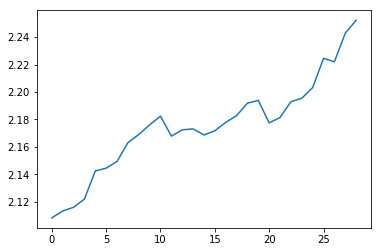

In [13]:
# 探究无特征工程下 m对mse影响
m = range(1,30)
model_kfold = LinearRegression()
#10折交叉验证
kf = KFold(n_splits=20)
result = []
for item in m:
    X,y = preprocess(data,item)
    mse = []
    for i,j in kf.split(X,y):
        model_kfold.fit([X[item] for item in i],[y[item] for item in i])
        y_est = model_kfold.predict([X[item] for item in j])
        y_est = y_est*(max_data-min_data)+min_data
        y_test =np.array([y[item] for item in j])*(max_data-min_data)+min_data
        mse.append(np.power(y_test-y_est,2).mean())
    
    result.append(np.array(mse).mean())
    print(item," length finished")
plt.plot(result)

### scoring评价标准

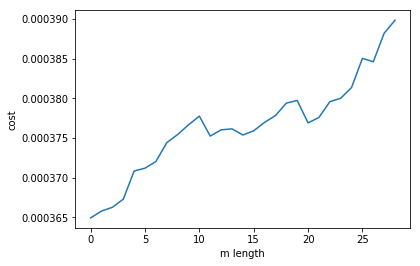

In [33]:
# 探究无特征工程下 m影响
m = 30
model_kfold = LinearRegression()
#10折交叉验证
result = []
for item in range(1,m):
    X,y = preprocess(data,item)
    scores = cross_val_score(model_kfold, X , y ,cv=20, scoring='neg_mean_squared_error')
    result.append(-np.array(scores).mean())
plt.xlabel("m length")
plt.ylabel("cost")
plt.plot(result)

# 特征工程 平稳率 线性回归

In [1]:
# 读取数据集
fileName = "raw_price_train/3_r_price_train.csv"
data = pd.read_csv(fileName)
data.head()

NameError: name 'pd' is not defined

In [2]:
plt.plot(data["Adj Close"].values)

NameError: name 'plt' is not defined

In [18]:
data = data.dropna()

In [19]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012/9/4,248.270004,251.000000,244.660004,247.880005,247.880005,3950800.0
1,2012/9/5,247.610001,248.610001,245.300003,246.220001,246.220001,2652600.0
2,2012/9/6,248.229996,252.699997,247.199997,251.380005,251.380005,5361400.0
3,2012/9/7,253.850006,259.420013,253.520004,259.140015,259.140015,5029500.0
4,2012/9/10,259.000000,260.000000,256.820007,257.089996,257.089996,2567200.0
5,2012/9/11,257.600006,257.600006,254.259995,255.669998,255.669998,2524800.0
6,2012/9/12,256.500000,257.779999,253.500000,255.630005,255.630005,2273200.0
7,2012/9/13,254.940002,262.000000,253.800003,260.239990,260.239990,3525600.0
8,2012/9/14,261.399994,264.109985,259.769989,261.269989,261.269989,3666200.0
9,2012/9/17,261.250000,261.250000,257.000000,258.000000,258.000000,2306300.0


In [20]:
data["mean"] = (data["Open"]+data["High"]+data["Low"]+data["Close"])/4

In [21]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,mean
0,2012/9/4,248.270004,251.000000,244.660004,247.880005,247.880005,3950800.0,247.952503
1,2012/9/5,247.610001,248.610001,245.300003,246.220001,246.220001,2652600.0,246.935001
2,2012/9/6,248.229996,252.699997,247.199997,251.380005,251.380005,5361400.0,249.877499
3,2012/9/7,253.850006,259.420013,253.520004,259.140015,259.140015,5029500.0,256.482509
4,2012/9/10,259.000000,260.000000,256.820007,257.089996,257.089996,2567200.0,258.227501
5,2012/9/11,257.600006,257.600006,254.259995,255.669998,255.669998,2524800.0,256.282501
6,2012/9/12,256.500000,257.779999,253.500000,255.630005,255.630005,2273200.0,255.852501
7,2012/9/13,254.940002,262.000000,253.800003,260.239990,260.239990,3525600.0,257.744999
8,2012/9/14,261.399994,264.109985,259.769989,261.269989,261.269989,3666200.0,261.637489
9,2012/9/17,261.250000,261.250000,257.000000,258.000000,258.000000,2306300.0,259.375000


In [22]:
# 平稳率
mean_values = data["mean"].values
data["stability"] = [np.var(mean_values[i-15:i+15]) if i>=15 else 0 for i in range(len(data))]
data["stability"].iloc[:15] = np.mean(data["stability"])

E:\anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,mean,stability
0,2012/9/4,248.270004,251.000000,244.660004,247.880005,247.880005,3950800.0,247.952503,252.895822
1,2012/9/5,247.610001,248.610001,245.300003,246.220001,246.220001,2652600.0,246.935001,252.895822
2,2012/9/6,248.229996,252.699997,247.199997,251.380005,251.380005,5361400.0,249.877499,252.895822
3,2012/9/7,253.850006,259.420013,253.520004,259.140015,259.140015,5029500.0,256.482509,252.895822
4,2012/9/10,259.000000,260.000000,256.820007,257.089996,257.089996,2567200.0,258.227501,252.895822
5,2012/9/11,257.600006,257.600006,254.259995,255.669998,255.669998,2524800.0,256.282501,252.895822
6,2012/9/12,256.500000,257.779999,253.500000,255.630005,255.630005,2273200.0,255.852501,252.895822
7,2012/9/13,254.940002,262.000000,253.800003,260.239990,260.239990,3525600.0,257.744999,252.895822
8,2012/9/14,261.399994,264.109985,259.769989,261.269989,261.269989,3666200.0,261.637489,252.895822
9,2012/9/17,261.250000,261.250000,257.000000,258.000000,258.000000,2306300.0,259.375000,252.895822


In [24]:
# 归一化
min_data = np.min(data["Adj Close"].values)
max_data = np.max(data["Adj Close"].values)
data["Adj Close"] = (data["Adj Close"]-min_data)/(max_data-min_data)
data["Volume"] = (data["Volume"]-np.min(data["Volume"].values))/np.max(data["Volume"].values)
#data["stability"] = (data["stability"]-np.min(data["stability"].values))/np.max(data["stability"].values)

In [25]:
max_data

679.0599980000001

In [26]:
#构造X and y
def preprocess_sta(data):
    '''
    data: the dataframe of stock price
    m: the length of sequence
    '''
    adj_close = data["Adj Close"].values
    x1 = adj_close[:-1]
    x2 = data["Volume"].values[:-1]
    x3 = data["stability"].values[:-1]
    res_X = np.stack((x1,x2,x3),axis=1)
    res_y = adj_close[1:]
    
    return res_X,res_y

In [27]:
X,y = preprocess_sta(data)

In [28]:
X

array([[5.95035542e-02, 1.24345555e-01, 2.52895822e+02],
       [5.58827279e-02, 6.99276076e-02, 2.52895822e+02],
       [6.71378082e-02, 1.83475086e-01, 2.52895822e+02],
       ...,
       [9.55459618e-01, 1.57988942e-01, 6.95230210e+01],
       [9.92823849e-01, 1.24919832e-01, 7.06583600e+01],
       [9.81656035e-01, 1.13061230e-01, 7.45831652e+01]])

In [29]:
y

array([0.05588273, 0.06713781, 0.08406406, 0.07959253, 0.07649521,
       0.07640797, 0.08646334, 0.08870999, 0.08157744, 0.08321335,
       0.0896043 , 0.08770665, 0.0804214 , 0.07459756, 0.06949353,
       0.06340791, 0.07850192, 0.07355059, 0.06851195, 0.06543646,
       0.07704051, 0.08696505, 0.08268988, 0.08388953, 0.0662217 ,
       0.05319984, 0.0515203 , 0.04746324, 0.05143303, 0.05090956,
       0.05865288, 0.05289447, 0.04231557, 0.0287484 , 0.02990445,
       0.01720979, 0.0050604 , 0.03847664, 0.02680712, 0.02517121,
       0.02578195, 0.02994808, 0.0369934 , 0.02499671, 0.0147232 ,
       0.01245472, 0.01280372, 0.01308729, 0.00512584, 0.        ,
       0.01009901, 0.01987087, 0.0287484 , 0.03801857, 0.04205383,
       0.05021155, 0.04973169, 0.05782401, 0.06689787, 0.06859922,
       0.06484753, 0.06955896, 0.07276535, 0.07147841, 0.0712603 ,
       0.05926362, 0.06563276, 0.06796665, 0.06685424, 0.06236094,
       0.07254721, 0.08681235, 0.08155561, 0.0892117 , 0.07922

In [30]:
kf = KFold(n_splits=10)
mse = []
model_kfold_sta = LinearRegression()
for i,j in kf.split(X,y):
    model_kfold_sta.fit([X[item] for item in i],[y[item] for item in i])
    y_est = model_kfold_sta.predict([X[item] for item in j])
    y_est = y_est*(max_data-min_data)+min_data
    y_test =np.array([y[item] for item in j])*(max_data-min_data)+min_data
    mse.append(np.power(y_test-y_est,2).mean())
print(np.mean(mse))

52.15680972384234
